### TPC7: Construir uma aplicação para manipular polinómios

Depois da aula da semana passada, já tens algumas funções desenvolvidas que te irão ajudar a construir a aplicação que se descreve a seguir.

* Aquecimento: Instancia os seguintes exemplos num ficheiro de texto com o formato definido na última aula
    - `x^7 - 3.7x^4 + 5x^3 - 88`
    - `2x^2 + 17`
    - `7x^4 + 6x^3 - x^2 + 43`
    - `x^4`
    - `x^2`
    - `x^3`

* Desenvolve as seguintes funcionalidades que não foram trabalhadas na aula:
    1. Define uma função que dado um polinómio calcula a sua derivada;
    2. Define uma função que recebe dois polinómios `p1` e `p2` e calcula um novo polinómio correspondente à soma de `p1` e `p2`;
    3. Define uma função que recebe um polinómio e o desenha num gráfico.

* Num ficheiro Python, cria uma aplicação para manipular polinómios com as seguintes operações:
    1. Criar um polinómio interativamente;
    2. Ler uma lista de polinómios de um ficheiro;
    3. Listar polinómios: mostra numa tabela os polinómios carregados em memória, adicionando um número de ordem a cada um;
    4. Calcular o valor de um polinómio num ponto (usa o número de ordem para referenciar o polinómio);
    5. Listar polinómios com grau: à listagem anterior, acrescenta mais uma coluna com o grau;
    6. Maior grau: mostra o polinómio de maior grau e indica o seu número de ordem;
    7. Derivada: mostra uma tabela com os polinómios e as respetivas derivadas;
    8. Somar dois polinómios: indicando os seus números de ordem;
    9. Gerar um gráfico para o polinómio;
    10. Gravar num ficheiro os polinómios em memória;
    0. Sair da aplicação


In [70]:
pol1=[(1,7),(-3.7,4),(5,3),(-88,0)]
pol2=[(7,4),(6,3),(-1,2),(43,0)]
pol3=[(1,4)]
pol4=[(1,2)]
pol5=[(1,3)]
listaPol=[pol1,pol2,pol3,pol4,pol5]


In [44]:
#1
def criaPolIn():
    resPol = []
    grau=int(input("Escolha o grau do seu polinomio"))
    while grau>-1: #ou while grau >=0:

        coef=int(input("Escolha o coeficiente do termo de grau"+ str(grau) +":"))
        if coef != 0:
            monomio=(coef, grau)
            resPol.append(monomio)
        grau=grau-1
        
    return resPol 
polinomio4 = criaPolIn()
print (polinomio4)

[(1, 4), (2, 3), (3, 2), (4, 1), (1, 0)]


In [42]:
#2
def leFicheiroPol(fnome):
    listPol = []
    with open(fnome, mode="r") as file:
        for line in file:
            termos = line.strip().split()
            polinomio = ""
            for term in termos:
                coef_str, expo_str = term.split(";")
                coef = float(coef_str)
                expo = float(expo_str)
                if polinomio:
                    polinomio += " + "
                if expo !=0:
                    polinomio += str(coef) + " x^" + str(expo)
                else:
                    polinomio += str(coef)
            listPol.append(polinomio)
    return listPol
polinomios = leFicheiroPol("polinomios2")
print(polinomios)

['1.0 x^7.0 + -3.7 x^4.0 + 5.0 x^3.0 + -88.0', '7.0 x^4.0 + 6.0 x^3.0 + -1.0 x^2.0 + 43.0', '1.0 x^4.0', '1.0 x^2.0', '1.0 x^3.0']


In [65]:
#3
def verPolinomios(polinomio):
    pol=""
    for termo in polinomio:
        coef,expo=termo
        monomio= str(coef)+"x^"+str(expo)
        pol= pol+"+"+monomio
    return pol
def listarPol(listap):
    numOrdem=1
    for i in range(0,len(listap)):
        print(numOrdem, "   |   ", verPolinomios(listap[i]))
        numOrdem=numOrdem+1

listarPol(listaPol)

1    |    +1x^7+-3.7x^4+5x^3+-88x^0
2    |    +7x^4+6x^3+-1x^2+43x^0
3    |    +1x^4
4    |    +1x^2
5    |    +1x^3


In [95]:
#4
def calcPolinomio(p, x):
    res = 0
    for termo in p:
        coeficiente=termo[0]
        potencia=termo[1]
        resul= coeficiente*(x**potencia)
        res=res+resul
    
    return res

calcPolinomio(pol3,2)

16

In [64]:
#5
def grauPolinomio(p):
    grau=p[0][1]
    for termo in p:
        if termo[1]>grau:
            grau=termo[1]  
    return grau

def listarGrau(listap):
    numOrdem=1
    print("nº pol|   polinomio   |        grau polinomio")
    for i in range(0,len(listap)):
        print(numOrdem, "   |   ", verPolinomios(listap[i]),"       |   ",grauPolinomio(listap[i]))
        numOrdem=numOrdem+1

listarGrau(listaPol)

nº pol|   polinomio   |        grau polinomio
1    |    +1x^7+-3.7x^4+5x^3+-88x^0        |    7
2    |    +7x^4+6x^3+-1x^2+43x^0        |    4
3    |    +1x^4        |    4
4    |    +1x^2        |    2
5    |    +1x^3        |    3


In [109]:
#6
def maiorGrauLista(listap):
    maior=grauPolinomio(listap[0])
    numPol=1
    for pol in listap:
        if grauPolinomio(pol)>maior:
            maior=grauPolinomio(pol)
            numPol+=1
    print("o polinomio", numPol, "tem grau", maior, "e é o de maior grau")
    return
#listaPol2 para testar o contador
listaPol2=[[(1, 7), (-3.7, 4), (5, 3), (-88, 0)], [(7, 8), (6, 3), (-1, 2), (43, 13)], [(1, 4)], [(1, 1)], [(1, 3)]]
print("na lista 1:")
maiorGrauLista(listaPol)
print("na lista 2:")
maiorGrauLista(listaPol2)


na lista 1:
o polinomio 1 tem grau 7 e é o de maior grau
na lista 2:
o polinomio 2 tem grau 13 e é o de maior grau


In [46]:
#7 mas tem de fazer tabela com todos
def derivarPolinomio(p):
    for t in p:
        c,g=t
        if g!=0 and g!=1:
            print("+",g*c,"x^",g-1,end="")
        if g==1:
            print(c, end="")
    return
derivarPolinomio(pol1)

+ 7 x^ 6+ -14.8 x^ 3+ 15 x^ 2

In [9]:
#8
def somarPolinomios(p1, p2):
    resultado = []
    i = 0
    j = 0
    while i < len(p1) and j < len(p2):
        coef1, grau1 = p1[i]
        coef2, grau2 = p2[j]
        if grau1 == grau2:
            resultado.append((coef1 + coef2, grau1))
            i += 1
            j += 1
        elif grau1 > grau2:
            resultado.append((coef1, grau1))
            i += 1
        else:
            resultado.append((coef2, grau2))
            j += 1

    while i < len(p1):
        coef, grau = p1[i]
        resultado.append((coef, grau))
        i += 1

    while j < len(p2):
        coef, grau = p2[j]
        resultado.append((coef, grau))
        j += 1

    return resultado

pol1 = [(1, 7), (-3.7, 4), (5, 3), (-88, 0)]  # x^7 - 3.7x^4 + 5x^3 - 88
pol2 = [(7, 4), (6, 3), (-1, 2), (43, 0)]   # 7x^4 + 6x^3 - x^2 + 43
#pol1=[(1,7),(-3.7,4),(5,3),(-88,0)] ## x^7 - 3.7x^4 + 5x^3 - 88
#pol2=[(7,4),(6,3),(-1,2),(43,0)] ##2x^2 + 17
somarPolinomios(pol1,pol2)

[(1, 7), (3.3, 4), (11, 3), (-1, 2), (-45, 0)]

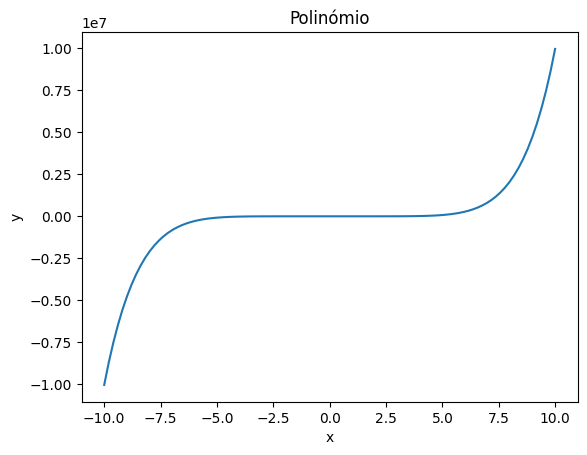

In [89]:
#9 gerar um grafico para o polinomio
import matplotlib.pyplot as plt
import numpy as np

def plot_polinomial(polinomial, intervalo, num_pontos=100):
    x_min, x_max = intervalo
    step = (x_max - x_min) / (num_pontos - 1)
    
    x = [x_min + i * step for i in range(num_pontos)]
    
    y = [0] * num_pontos
    for coef, expo in polinomial:
        for i in range(num_pontos):
            y[i] += coef * (x[i] ** expo)
    
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polinómio')
    plt.show()

plot_polinomial(pol1, intervalo=(-10, 10))


In [11]:
#10
def guardarPolinomios(listap, fnome):
    file=open(fnome,"w")
    for p in listap:
        for termo in p:
            coe, grau=termo
            file.write(str(coe)+";"+ str(grau)+"  ")
        file.write("\n")
        
    return

guardarPolinomios(listaPol,"polinomios2")

[(7, 2), (4, 1), (2, 0)]
['1.0 x^7.0 + -3.7 x^4.0 + 5.0 x^3.0 + -88.0', '7.0 x^4.0 + 6.0 x^3.0 + -1.0 x^2.0 + 43.0', '1.0 x^4.0', '1.0 x^2.0', '1.0 x^3.0']
1    |    +1x^7+-3.7x^4+5x^3+-88x^0
2    |    +7x^4+6x^3+-1x^2+43x^0
3    |    +1x^4
4    |    +1x^2
5    |    +1x^3
199
nº pol|   polinomio   |        grau polinomio
1    |    +1x^7+-3.7x^4+5x^3+-88x^0        |    7
2    |    +7x^4+6x^3+-1x^2+43x^0        |    4
3    |    +1x^4        |    4
4    |    +1x^2        |    2
5    |    +1x^3        |    3
None
o polinomio 1 tem grau 7 e é o de maior grau
+ 4 x^ 3None
[(8, 4), (6, 3), (-1, 2), (43, 0)]


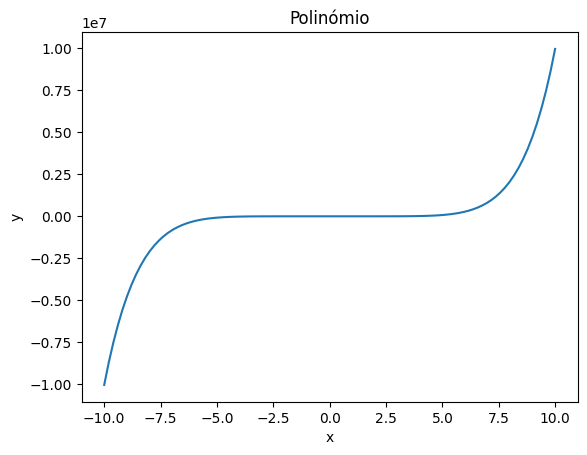

Fim


In [121]:
#11
def menu():
    opção= int(input("introduza 1 número entre 1 e 11"))
    while opção!=11:
        if opção==1:
            print(criaPolIn())
        elif opção==2:
            polinomios = leFicheiroPol("polinomios2")
            print(polinomios)
        elif opção==3:
            listarPol(listaPol)
        elif opção ==4:
            n=int(input('indique o nº do polinomio'))
            p=listaPol[n-1]
            x=int(input('indique o valor de x'))
            print(calcPolinomio(p, x))
        elif opção==5:
            print(listarGrau(listaPol))
        elif opção==6:
            maiorGrauLista(listaPol)
        elif opção==7:
            n=int(input('indique o nº do polinomio'))
            p=listaPol[n-1]
            print(derivarPolinomio(p))
        elif opção==8:
            r=int(input('indique o nº do primeiro polinomio'))
            p=listaPol[r-1]
            x=int(input('indique o nº do segundo polinomio'))
            n=listaPol[x-1]
            print(somarPolinomios(p,n))
        elif opção==9:
            n=int(input('indique o nº do polinomio'))
            p=listaPol[n-1]
            x=int(input("indique o limite inferior"))
            y=int(input("indique o limite superior"))
            plot_polinomial(p,intervalo=(x, y))
        elif opção==10:
            guardarPolinomios(listaPol, "polinomios2")
        opção= int(input("introduza 1 número entre 1 e 11"))
    print("Fim")
    

menu()
